### QUEST
- 분석 대상 : 
성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 데이터셋 만들기
- option : 연령이 중앙값~Q3 범위 속한 인원 수 찾기

In [76]:
import pandas as pd

In [77]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [78]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [79]:
df_ROS_forpatient = df_ROS[['성별', '신장','심혈관질환', '체중','흡연여부','연령','직업','혈액형','재발여부']]
df_ROS_forpatient.tail(3) # 뒤에서 부터 3개 추출

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


In [80]:
df_ROS_forpatient.sort_values(by=['혈액형', '직업'], ascending=[True, False]) #정렬

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
60,1,171,0,71.5,0,22,학생,RH+A,0
176,1,170,0,71.1,0,18,학생,RH+A,0
184,2,159,0,58.9,0,17,학생,RH+A,0
224,2,171,0,63.1,0,19,학생,RH+A,0
272,1,169,0,70.3,1,24,학생,RH+A,0
...,...,...,...,...,...,...,...,...,...
1710,1,183,0,99.7,0,40,NaN,RH+O,0
1715,1,178,0,83.0,1,29,NaN,RH+O,0
1718,2,163,0,54.0,0,35,NaN,RH+O,0
1726,1,169,0,75.0,0,49,NaN,RH+O,0


In [81]:
df_ROS_QUEST = df_ROS_forpatient [['혈액형', '직업', '성별']]  # 추출
df_ROS_QUEST.iloc[:5]  # 상위 5개 표시

,혈액형,직업,성별
0,RH+A,자영업,2
1,RH+A,운동선수,1
2,RH+B,특수전문직,1
3,RH+O,주부,1
4,RH+A,특수전문직,1


In [82]:
df_ROS_forpatient[['직업']].value_counts() # 직업군이 상위 1,2위에 속하는 항목 확인

직업   
사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
농업        40
의료직       40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
dtype: int64

In [83]:
df_ROS_forpatient['직업'].value_counts().index

Index(['사무직', '자영업', '무직', '학생', '주부', '군인', '공무원', '운수업', '노동직', '농업', '의료직',
       '사업가', '교사', '특수전문직', '건설업', '운동선수', '예술가'],
      dtype='object')

In [84]:
df_ROS_forpatient['직업'].value_counts().index[0]

'사무직'

In [85]:
df_df = df_ROS_forpatient['직업'].value_counts().iloc[:2]
df_df

사무직    449
자영업    171
Name: 직업, dtype: int64

In [86]:
df_df.index[1]

'자영업'

In [87]:
condition = (df_ROS_forpatient['직업'] == '자영업') | (df_ROS_forpatient['직업'] == '사무직')  #'자영업', '사무직' 항목만 추출 (하드코딩 방법)
df_ROS_QUEST2 = df_ROS_forpatient.loc[condition] 
df_ROS_QUEST2

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
5,2,164,0,60.8,1,60,자영업,RH+AB,0
11,1,162,0,64.9,0,65,자영업,RH+O,0
23,1,179,1,77.8,0,42,사무직,RH+B,0
30,1,173,0,73.3,0,52,사무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
1883,1,174,0,66.0,0,56,자영업,RH+O,1
1888,1,165,0,63.0,0,59,자영업,RH+A,0
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0


In [88]:
condition = (df_ROS_forpatient['직업'] == df_df.index[1]) | (df_ROS_forpatient['직업'] == df_df.index[0]) # 직업군 1,2위만 추출 (하드코딩 x)
df_ROS_forpatient.loc[condition]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
5,2,164,0,60.8,1,60,자영업,RH+AB,0
11,1,162,0,64.9,0,65,자영업,RH+O,0
23,1,179,1,77.8,0,42,사무직,RH+B,0
30,1,173,0,73.3,0,52,사무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
1883,1,174,0,66.0,0,56,자영업,RH+O,1
1888,1,165,0,63.0,0,59,자영업,RH+A,0
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0


In [89]:
condition = (df_ROS_QUEST2['체중'] > 70) & (df_ROS_QUEST2['신장'] > 170) & (df_ROS_QUEST2['흡연여부'] == 0) # 조건 걸기
df_ROS_QUEST22 = df_ROS_QUEST2.loc[condition]
df_ROS_QUEST22

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
23,1,179,1,77.8,0,42,사무직,RH+B,0
30,1,173,0,73.3,0,52,사무직,RH+O,0
40,1,182,0,80.2,0,50,사무직,RH+A,1
53,1,185,0,82.7,0,40,사무직,RH+O,0
72,1,171,0,72.1,0,30,자영업,RH+A,0
...,...,...,...,...,...,...,...,...,...
1830,1,176,0,80.0,0,32,자영업,RH+O,0
1841,1,175,0,99.0,0,32,자영업,RH+A,1
1855,1,187,0,74.0,0,29,사무직,RH+B,0
1871,1,177,0,82.0,0,47,사무직,RH+B,0


In [90]:
df_ROS_QUEST22.shape  # 해당 레코드 갯수 표현

(164, 9)

In [122]:
import matplotlib.pyplot as plt
import matplotlib as mpl  # 한글처리 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np

In [92]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [93]:
df_ROS_forpatient.describe(include=object) # 범주형

,직업,혈액형
count,1479,1894
unique,17,4
top,사무직,RH+A
freq,449,688


In [94]:
df_ROS_forpatient.describe() # 연속형

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569,0.119852
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629,0.324874
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000,0.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000,0.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


In [95]:
df_ROS_forpatient.describe(include=object).columns

Index(['직업', '혈액형'], dtype='object')

In [96]:
df_ROS_forpatient['직업'].value_counts()

사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
농업        40
의료직       40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

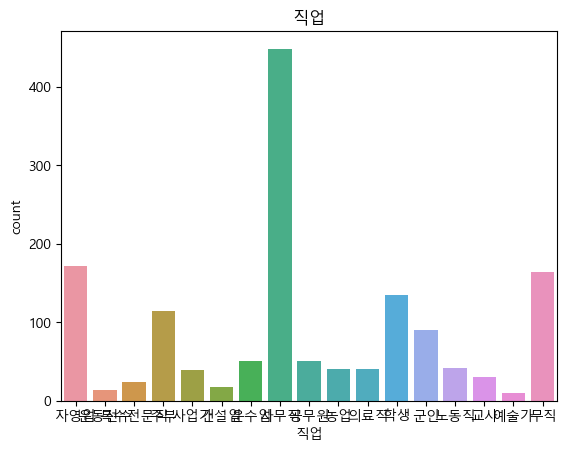

In [97]:
sns.countplot(data=df_ROS_forpatient, x='직업')# 빈도수를 확인 
plt.title("직업")
plt.show()

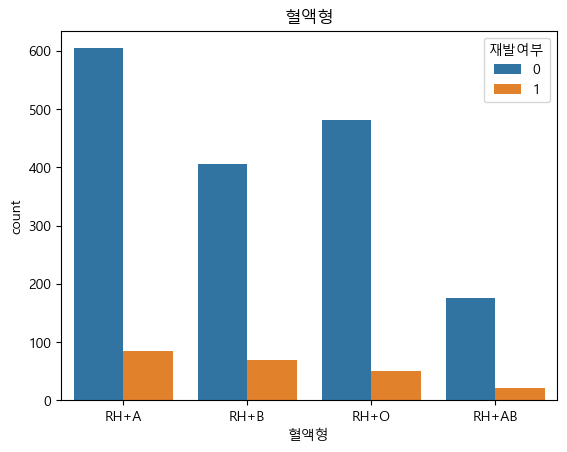

In [98]:
sns.countplot(data=df_ROS_forpatient, x='혈액형' , hue='재발여부')# 혈액형에 따른 재발여부
plt.title("혈액형")
plt.show()

In [99]:
df_ROS_forpatient.describe().columns #연송형

Index(['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '재발여부'], dtype='object')

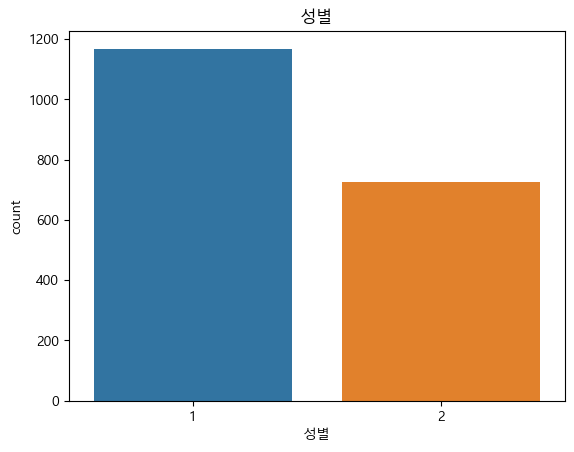

In [100]:
sns.countplot(data=df_ROS_forpatient, x='성별')
plt.title("성별")
plt.show()

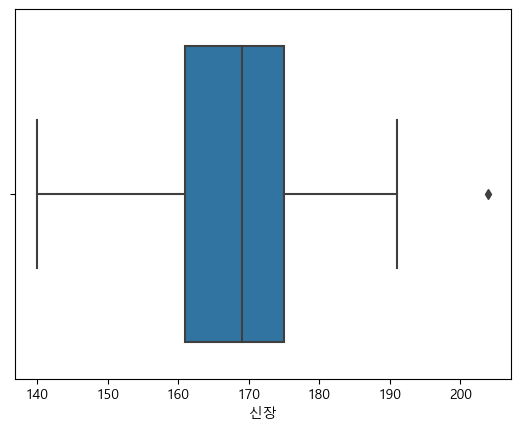

In [101]:
sns.boxplot(data=df_ROS_forpatient, x='신장') 
plt.show()

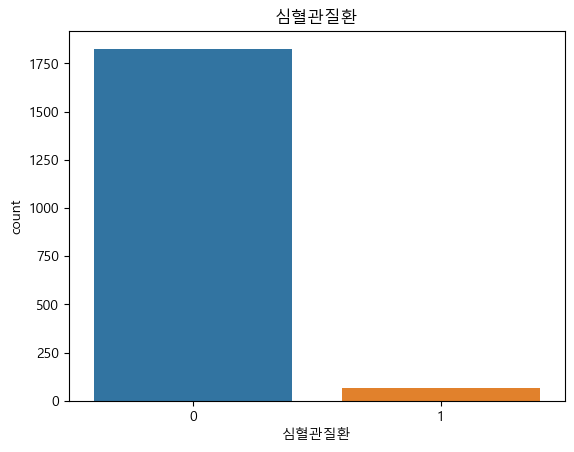

In [102]:
sns.countplot(data=df_ROS_forpatient, x='심혈관질환')# 빈도수를 확인 
plt.title("심혈관질환")
plt.show()

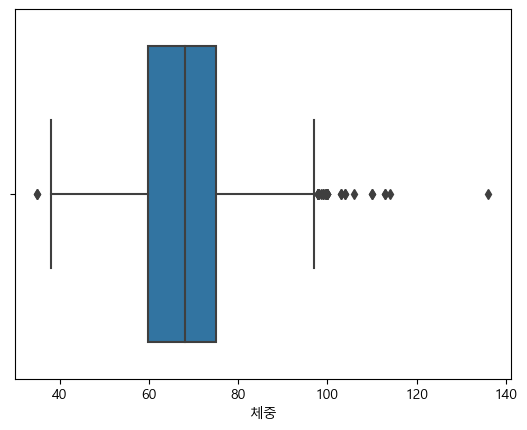

In [103]:
sns.boxplot(data=df_ROS_forpatient, x='체중') 
plt.show()

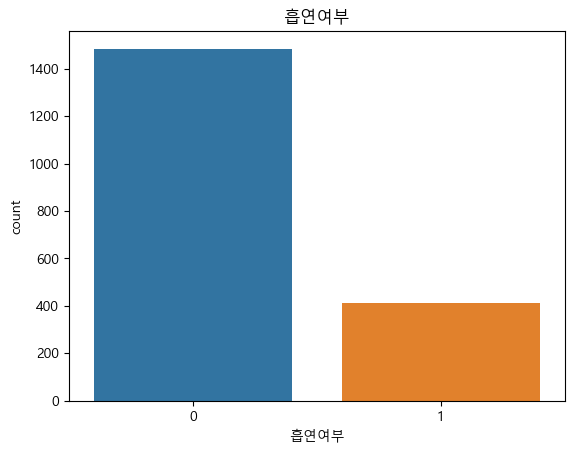

In [104]:
sns.countplot(data=df_ROS_forpatient, x='흡연여부')
plt.title("흡연여부")
plt.show()

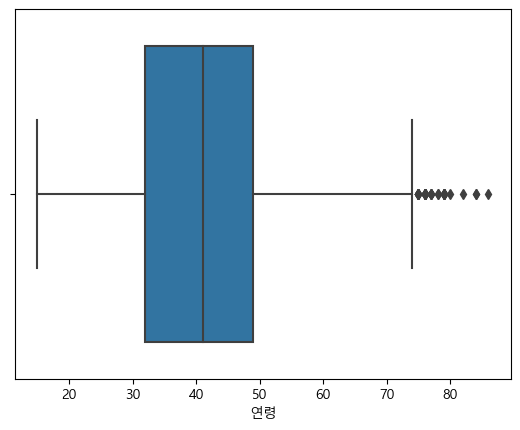

In [121]:
sns.boxplot(data=df_ROS_forpatient, x='연령') 
plt.show()

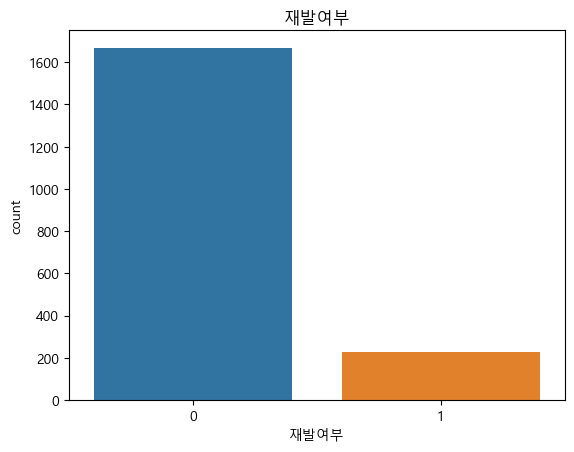

In [106]:
sns.countplot(data=df_ROS_forpatient, x='재발여부')
plt.title("재발여부")
plt.show()

In [107]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [108]:
df_ROS_forpatient.isnull().sum() #null의 유무 확인 

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [109]:
df_ROS_forpatient_dropna = df_ROS_forpatient.dropna() #null인 직업레코드 drop
df_ROS_forpatient_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


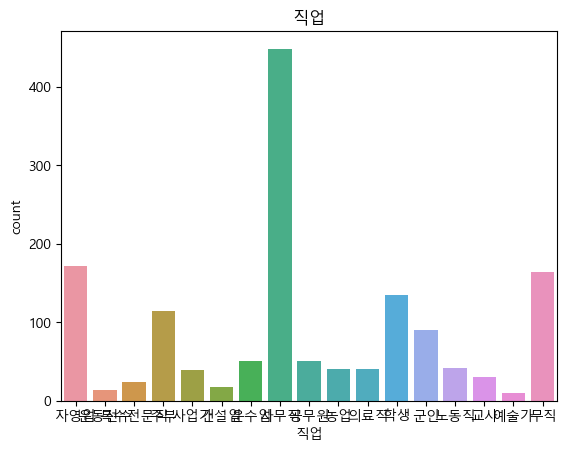

In [110]:
sns.countplot(data=df_ROS_forpatient, x='직업')# 빈도수를 확인 
plt.title("직업")
plt.show()

#### 신장 이상치 삭제

In [111]:
df_ROS_forpatient_dropna['신장'].describe()

count    1479.000000
mean      168.158891
std         9.250669
min       140.000000
25%       161.000000
50%       169.000000
75%       175.000000
max       204.000000
Name: 신장, dtype: float64

In [112]:
#Q1, Q3 구함 
Q1 = df_ROS_forpatient_dropna['신장'].describe()['25%'] # Q1값 가져오기
Q3 = df_ROS_forpatient_dropna['신장'].describe()['75%'] # Q3값 가져오기
IQR = Q3 - Q1

In [113]:
Q1,Q3, IQR

(161.0, 175.0, 14.0)

In [114]:
bound_up = Q3 + 1.5 * IQR #3분위 밖 
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up

(140.0, 196.0)

In [115]:
# filter
condition = (df_ROS_forpatient_dropna['신장'] <= bound_up) # 긍정 조건 변환
condition

0       True
1       True
2       True
3       True
4       True
        ... 
1889    True
1890    True
1891    True
1892    True
1893    True
Name: 신장, Length: 1479, dtype: bool

In [116]:
df_ROS_condition = df_ROS_forpatient_dropna[condition]

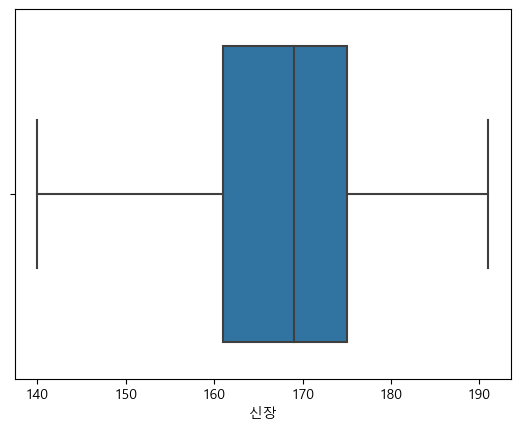

In [117]:
sns.boxplot(data=df_ROS_condition, x='신장')
plt.show()

#### 체중 이상치 제거

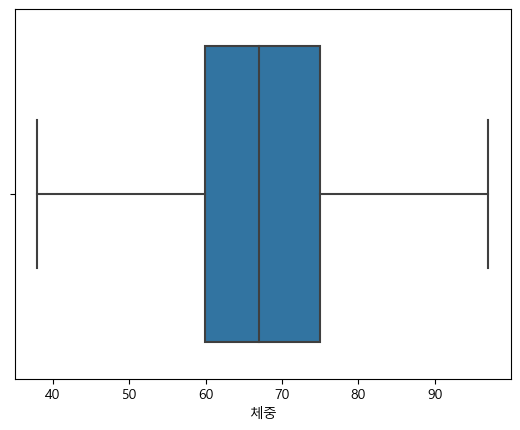

In [118]:
df_ROS_forpatient_dropna['체중'].describe()
#Q1, Q3 구함 
Q1 = df_ROS_forpatient_dropna['체중'].describe()['25%'] # Q1값 가져오기
Q3 = df_ROS_forpatient_dropna['체중'].describe()['75%'] # Q3값 가져오기
IQR = Q3 - Q1
bound_up = Q3 + 1.5 * IQR #3분위 밖 
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up
# filter
condition = (df_ROS_forpatient_dropna['체중'] <= bound_up) & (df_ROS_forpatient_dropna['체중'] >= bound_low) # 긍정 조건 변환
condition
df_ROS_condition = df_ROS_forpatient_dropna[condition]
sns.boxplot(data=df_ROS_condition, x='체중')
plt.show()

#### 연령 이상치 제거

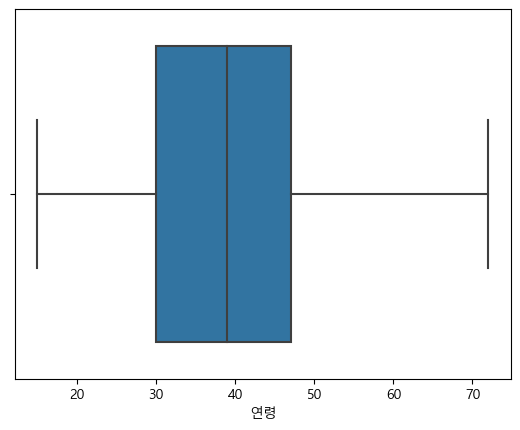

In [119]:
df_ROS_forpatient_dropna['연령'].describe()
#Q1, Q3 구함 
Q1 = df_ROS_forpatient_dropna['연령'].describe()['25%'] # Q1값 가져오기
Q3 = df_ROS_forpatient_dropna['연령'].describe()['75%'] # Q3값 가져오기
IQR = Q3 - Q1
bound_up = Q3 + 1.5 * IQR #3분위 밖 
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up
# filter
condition = (df_ROS_forpatient_dropna['연령'] <= bound_up) & (df_ROS_forpatient_dropna['연령'] >= bound_low) # 긍정 조건 변환
condition
df_ROS_condition = df_ROS_forpatient_dropna[condition]
sns.boxplot(data=df_ROS_condition, x='연령')
plt.show()

In [120]:
Q1,Q3,IQR

(30.0, 47.0, 17.0)